In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
import os
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('parkinsons.data')

In [11]:
df['patient'] = df['name'].apply(lambda x: '_'.join(x.split('_')[:3]))

In [13]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,patient
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,phon_R01_S01
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,phon_R01_S01
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,phon_R01_S01
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,phon_R01_S01
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,phon_R01_S01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [17]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [19]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
patient             0
dtype: int64

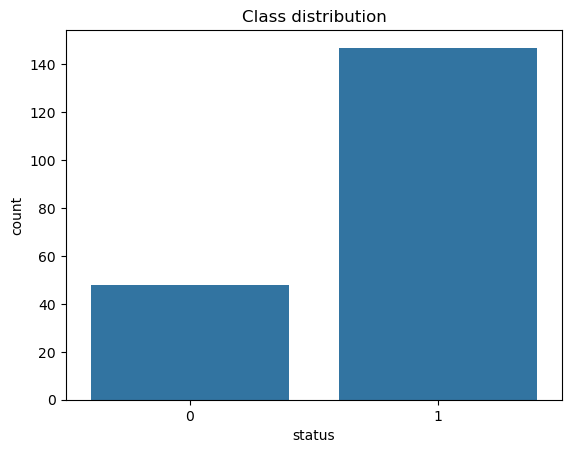

In [21]:
#Анализа на таргет променливата
sns.countplot(x='status', data=df)
plt.title('Class distribution')
plt.show()

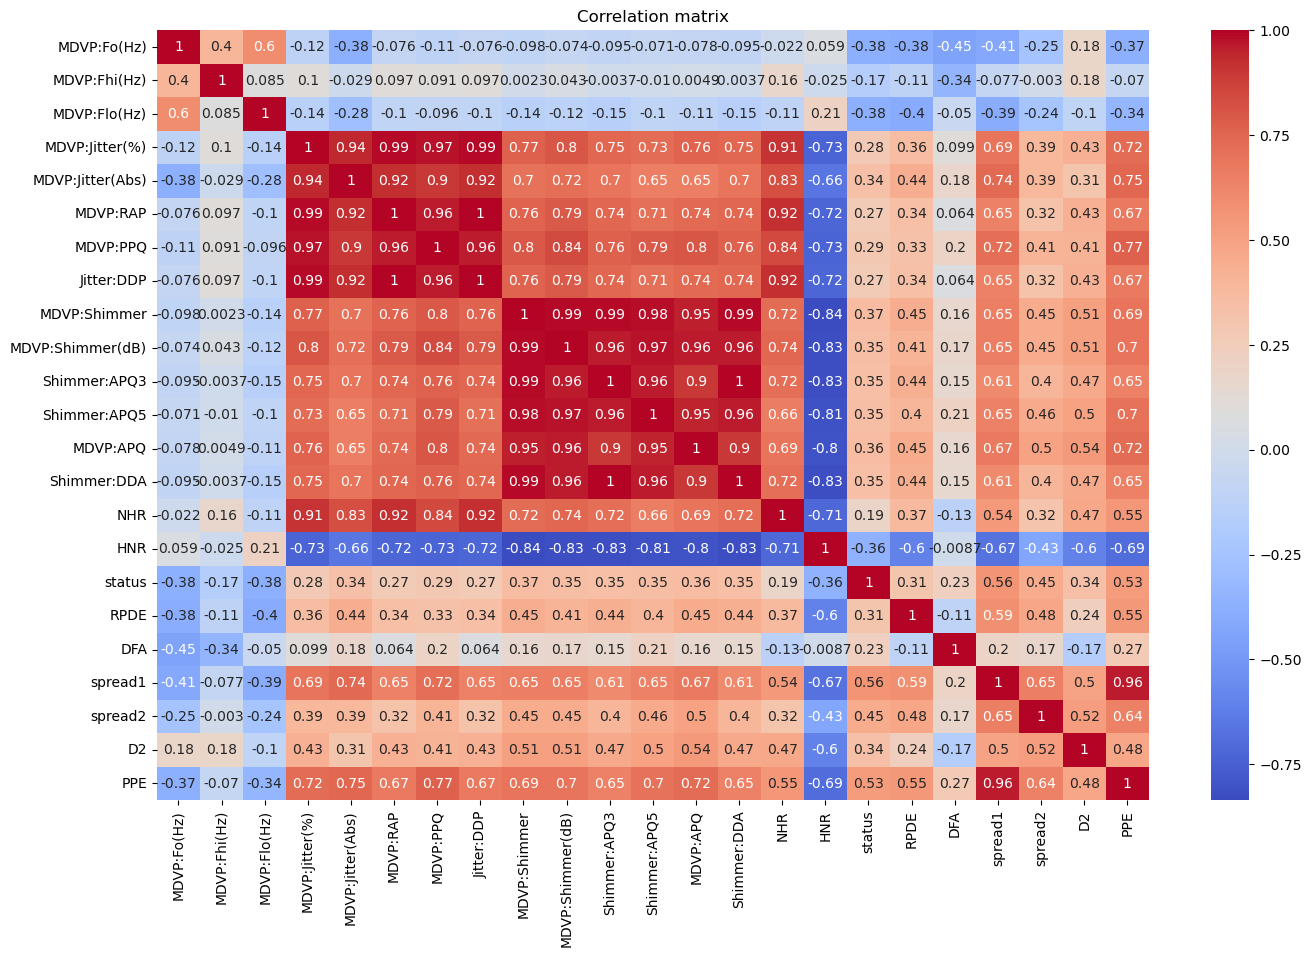

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [27]:
correlated_features_to_drop = [
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', # Jitter група
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', # Shimmer група
    'NHR', # Задржуваме HNR поради негативната корелација
    'PPE' # Задржуваме spread1
]

In [29]:
df = df.drop(columns=correlated_features_to_drop)

In [31]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,status,RPDE,DFA,spread1,spread2,D2,patient
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.04374,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,phon_R01_S01
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.06134,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,phon_R01_S01
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.05233,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,phon_R01_S01
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.05492,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,phon_R01_S01
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.06425,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,phon_R01_S01


In [33]:
X = df.drop(['status', 'name', 'patient'], axis=1)
y = df['status']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
#комбинирање со ID на пациент и статус за операции по пациент
df_processed = X_scaled_df.copy()
df_processed['patient'] = df['patient']
df_processed['status'] = df['status']

Фаза 1: Анализа на стадиумите на болеста по пациент

Се анализираат пациенти со повеќекратни снимки за промени во состојбата и биомаркерите.

In [43]:
# Идентификување на пациенти со повеќекратни примероци
patient_counts = df_processed['patient'].value_counts()
multi_sample_subjects = patient_counts[patient_counts > 1].index.tolist()

In [47]:
patient_counts.value_counts()

count
6    29
7     3
Name: count, dtype: int64

In [49]:
multi_sample_subjects

['phon_R01_S35',
 'phon_R01_S27',
 'phon_R01_S21',
 'phon_R01_S01',
 'phon_R01_S25',
 'phon_R01_S49',
 'phon_R01_S44',
 'phon_R01_S43',
 'phon_R01_S42',
 'phon_R01_S39',
 'phon_R01_S37',
 'phon_R01_S34',
 'phon_R01_S33',
 'phon_R01_S32',
 'phon_R01_S31',
 'phon_R01_S26',
 'phon_R01_S24',
 'phon_R01_S02',
 'phon_R01_S22',
 'phon_R01_S20',
 'phon_R01_S19',
 'phon_R01_S18',
 'phon_R01_S17',
 'phon_R01_S16',
 'phon_R01_S13',
 'phon_R01_S10',
 'phon_R01_S08',
 'phon_R01_S07',
 'phon_R01_S06',
 'phon_R01_S05',
 'phon_R01_S04',
 'phon_R01_S50']


Пациент: phon_R01_S35
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


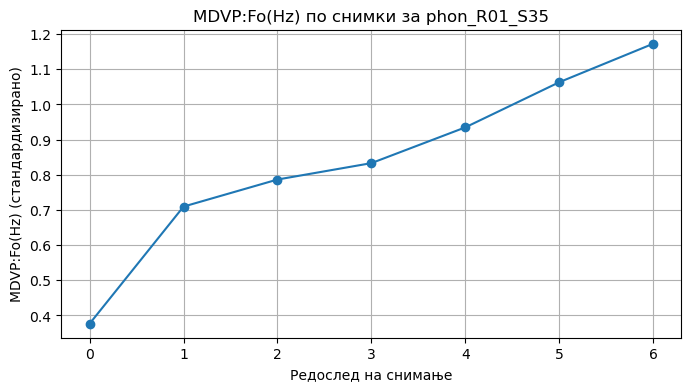


Пациент: phon_R01_S27
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


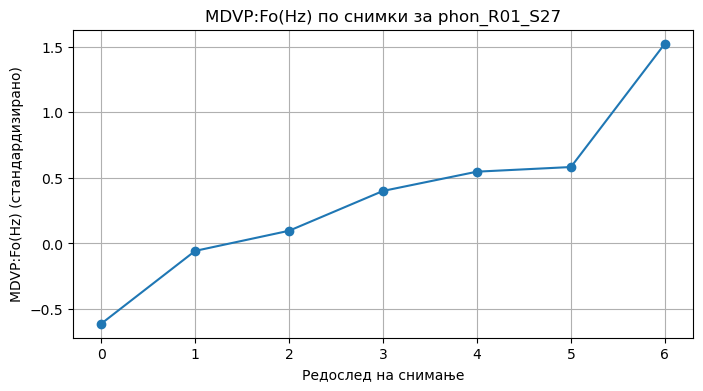


Пациент: phon_R01_S21
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


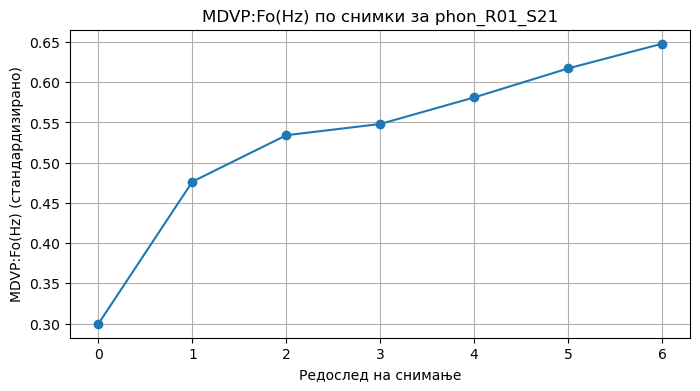


Пациент: phon_R01_S01
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


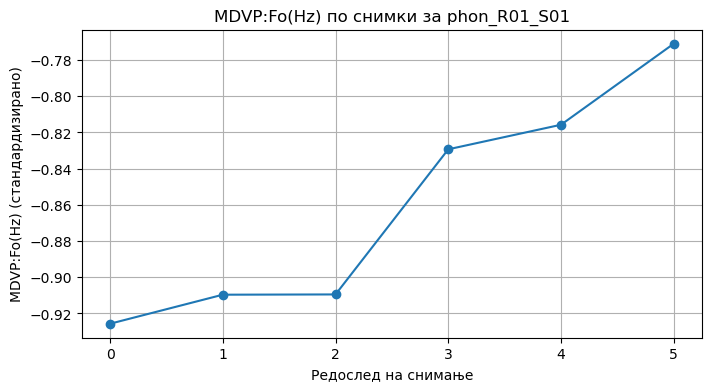


Пациент: phon_R01_S25
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


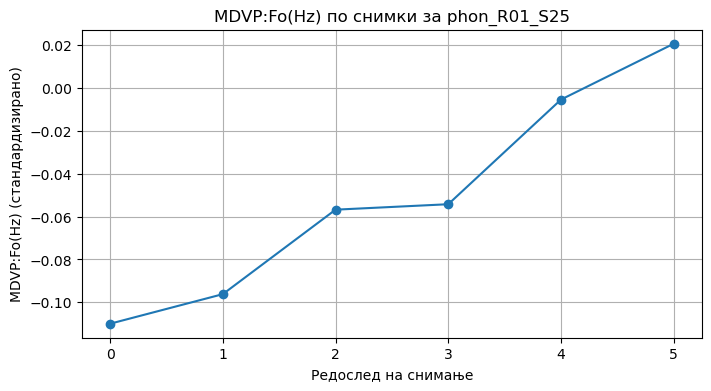


Пациент: phon_R01_S49
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


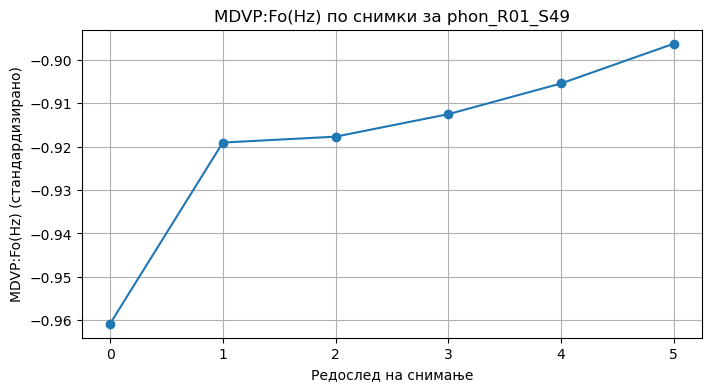


Пациент: phon_R01_S44
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


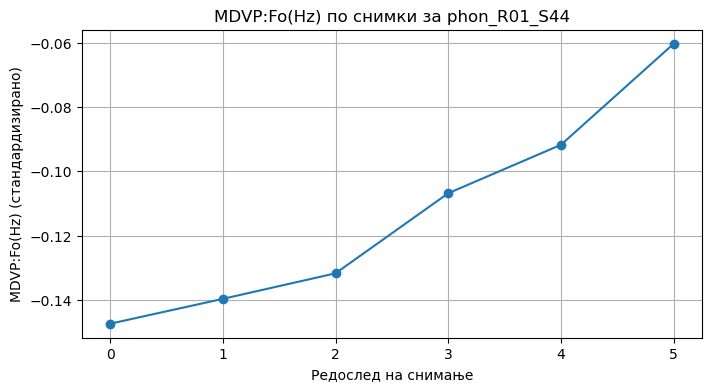


Пациент: phon_R01_S43
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


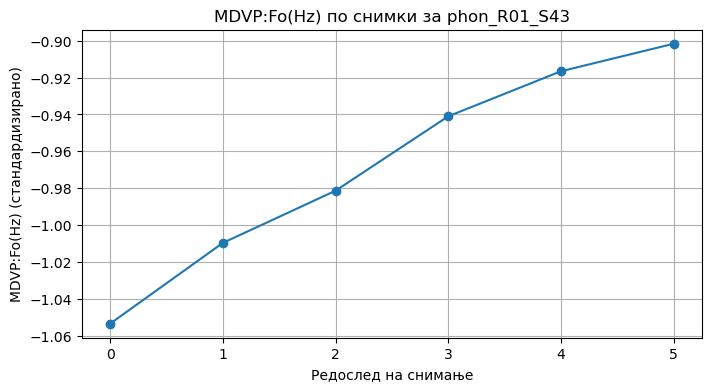


Пациент: phon_R01_S42
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


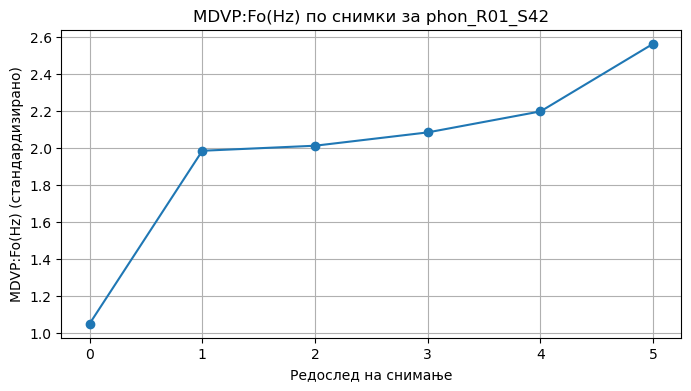


Пациент: phon_R01_S39
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


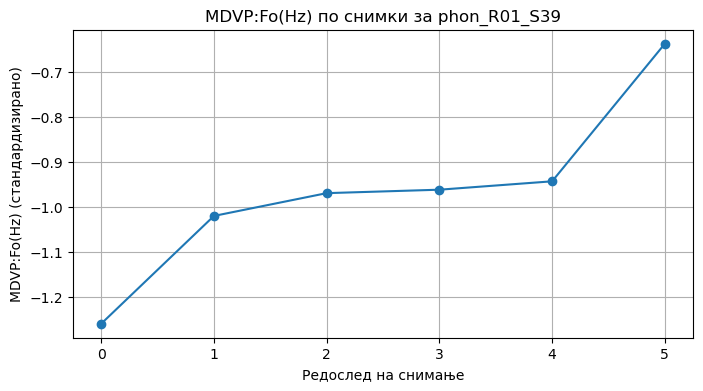


Пациент: phon_R01_S37
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


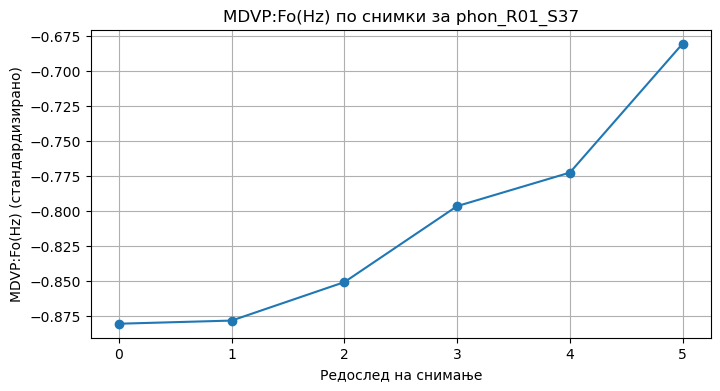


Пациент: phon_R01_S34
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


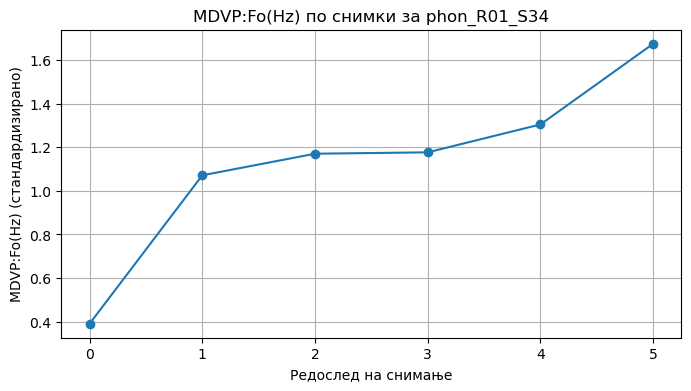


Пациент: phon_R01_S33
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


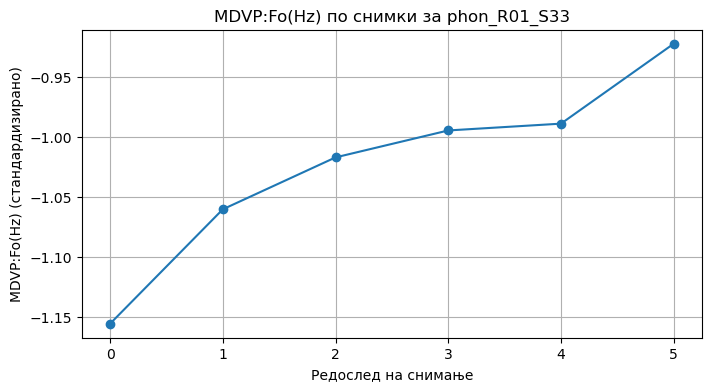


Пациент: phon_R01_S32
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


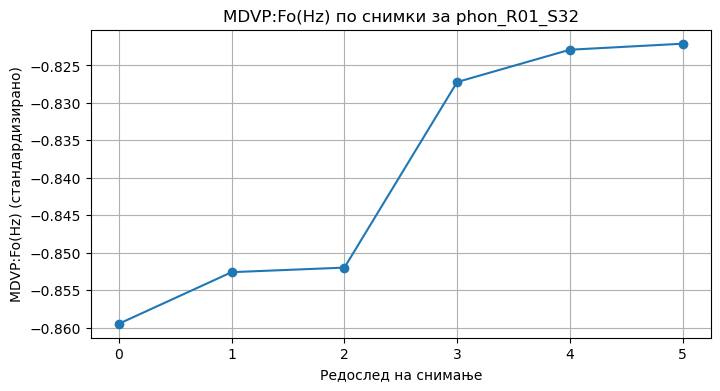


Пациент: phon_R01_S31
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


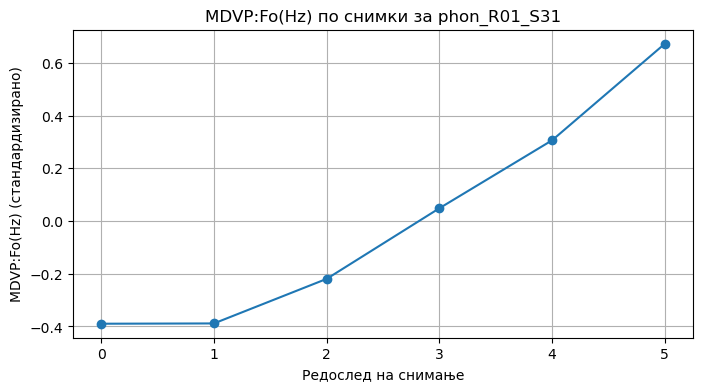


Пациент: phon_R01_S26
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


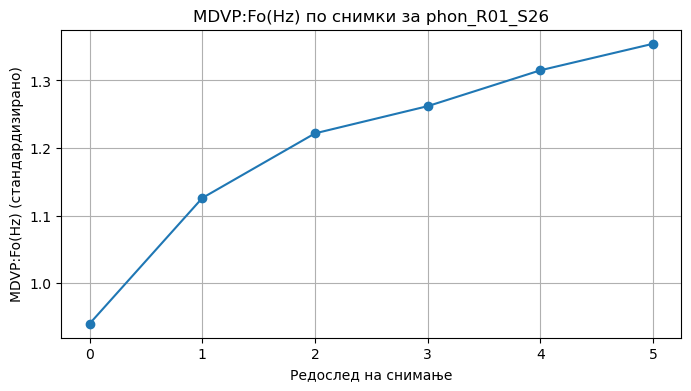


Пациент: phon_R01_S24
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


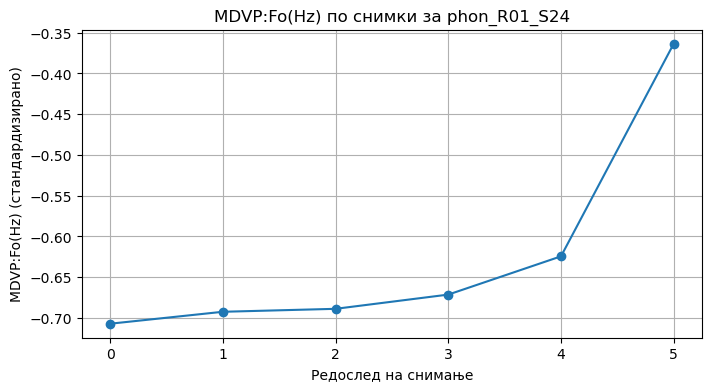


Пациент: phon_R01_S02
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


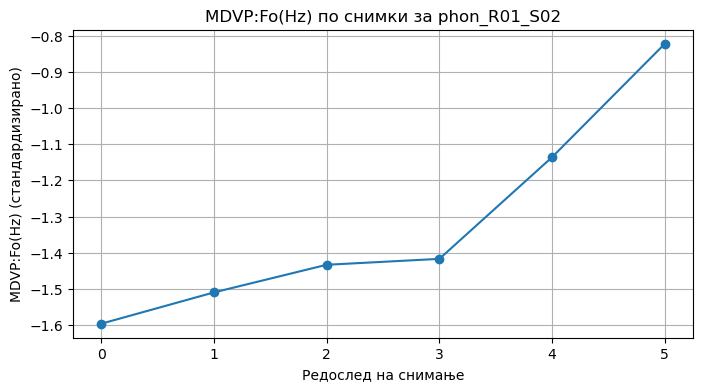


Пациент: phon_R01_S22
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


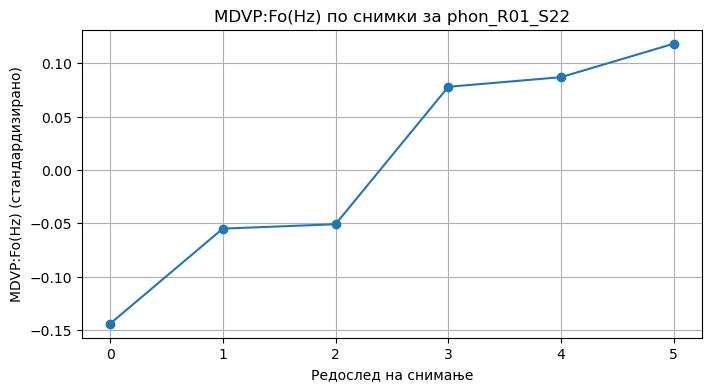


Пациент: phon_R01_S20
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


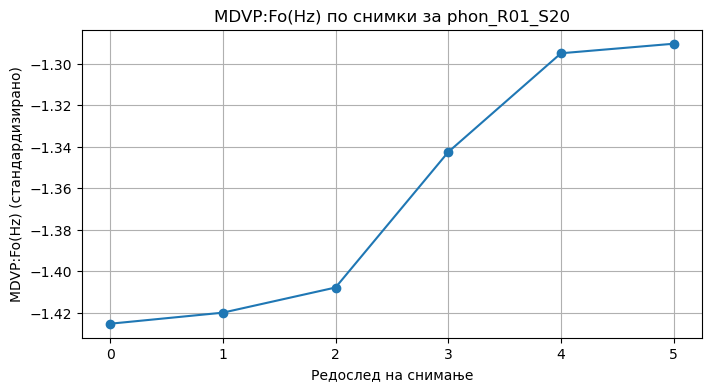


Пациент: phon_R01_S19
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


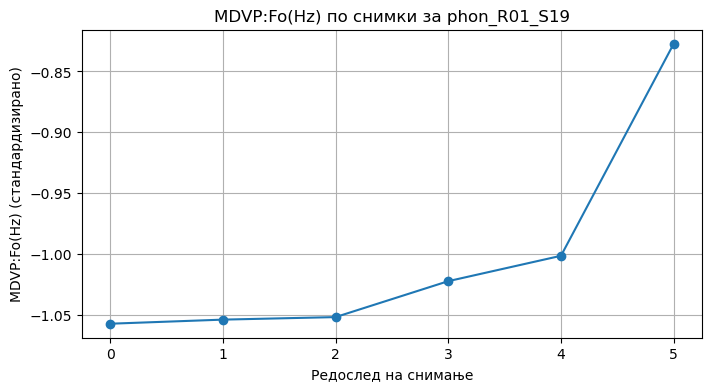


Пациент: phon_R01_S18
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


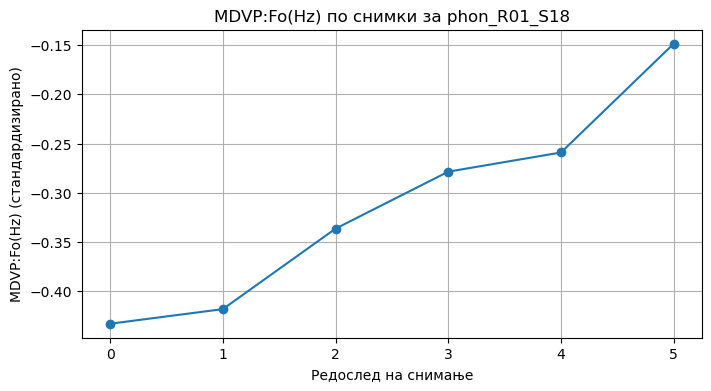


Пациент: phon_R01_S17
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


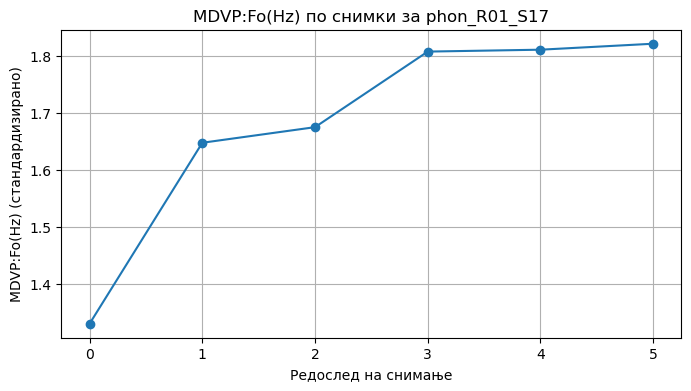


Пациент: phon_R01_S16
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


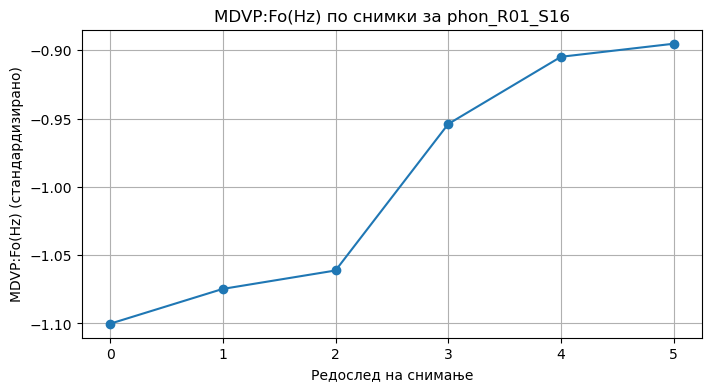


Пациент: phon_R01_S13
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


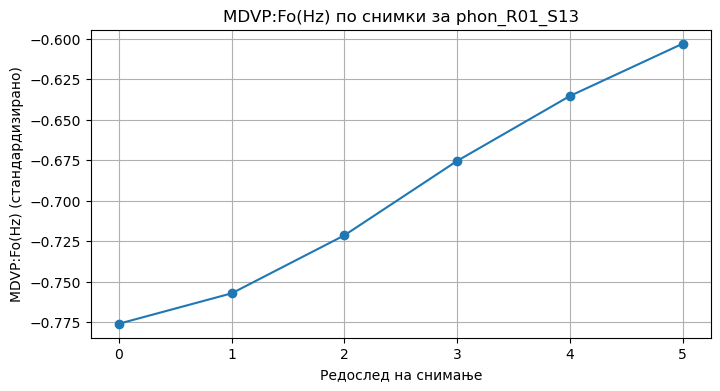


Пациент: phon_R01_S10
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


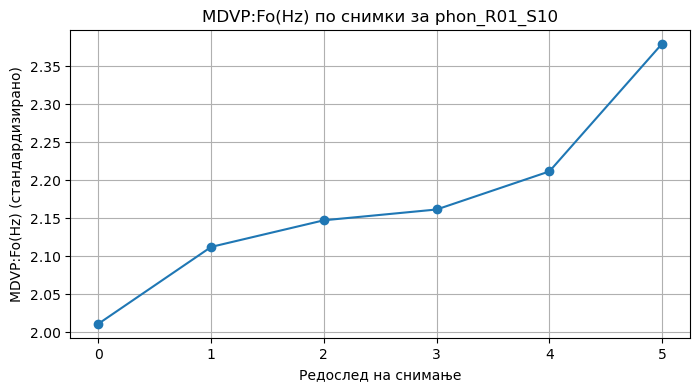


Пациент: phon_R01_S08
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


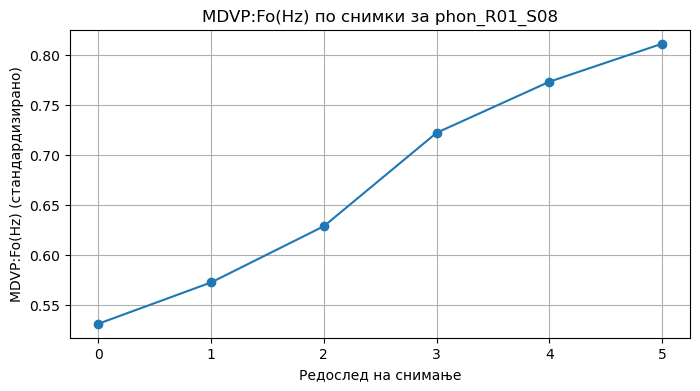


Пациент: phon_R01_S07
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


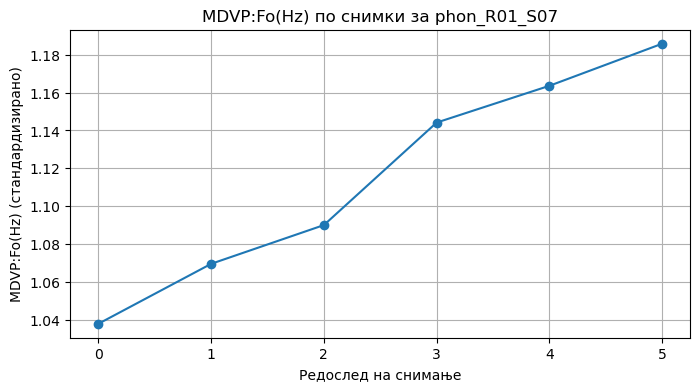


Пациент: phon_R01_S06
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


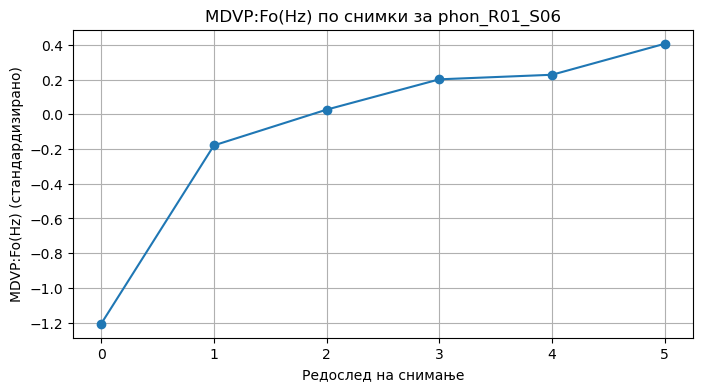


Пациент: phon_R01_S05
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


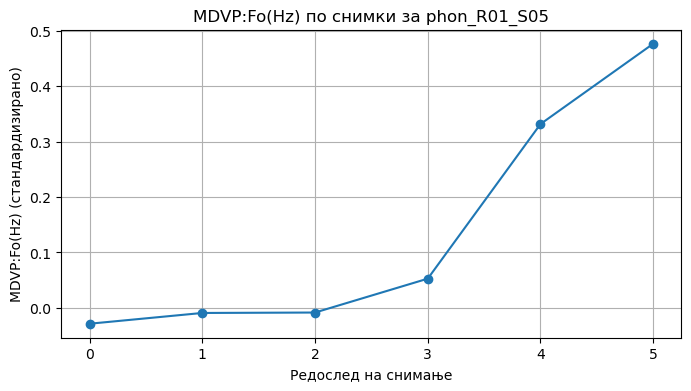


Пациент: phon_R01_S04
Состојби (по редослед на снимање): [1, 1, 1, 1, 1, 1]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


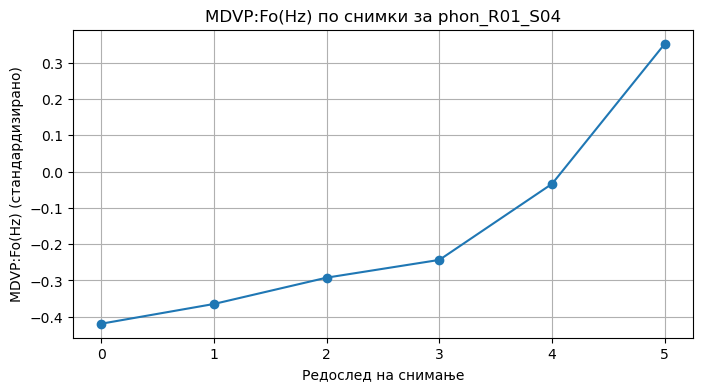


Пациент: phon_R01_S50
Состојби (по редослед на снимање): [0, 0, 0, 0, 0, 0]
Нема значајно влошување на состојбата (или состојбата е конзистентна).


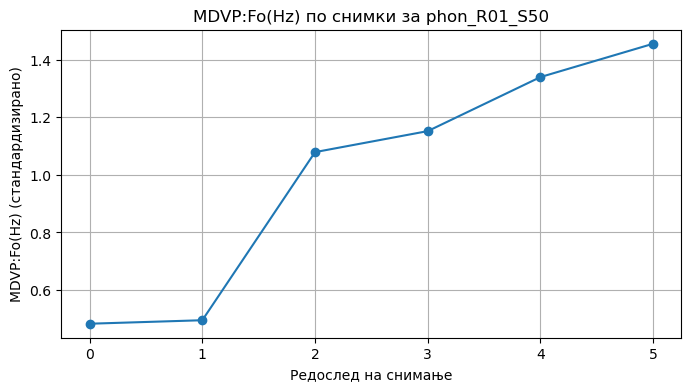

In [51]:
for subject_id in multi_sample_subjects:
        # Сортирање по првата карактеристика за конзистентен редослед, иако не е временски
        patient_data = df_processed[df_processed['patient'] == subject_id].sort_values(by=df_processed.columns[0])

        # Проверка за промена на статус (од 0 на 1)
        status_sequence = patient_data['status'].tolist()
        worsening = False
        if 0 in status_sequence and 1 in status_sequence and status_sequence.index(0) < status_sequence.index(1):
            worsening = True

        print(f"\nПациент: {subject_id}")
        print("Состојби (по редослед на снимање):", status_sequence)

        if worsening:
            print("Влошување на состојбата забележано → Потребна е понатамошна евалуација/интервенција!")
        else:
            print("Нема значајно влошување на состојбата (или состојбата е конзистентна).")

        # Визуелизација на примерок биомаркер: MDVP:Fo(Hz)
        if 'MDVP:Fo(Hz)' in patient_data.columns:
            plt.figure(figsize=(8, 4))
            plt.plot(patient_data['MDVP:Fo(Hz)'].values, marker='o')
            plt.title(f"MDVP:Fo(Hz) по снимки за {subject_id}")
            plt.xlabel("Редослед на снимање")
            plt.ylabel("MDVP:Fo(Hz) (стандардизирано)")
            plt.grid(True)
            plt.show()
        else:
            print(f"Колоната 'MDVP:Fo(Hz)' не е пронајдена за визуелизација за пациентот {subject_id}.")

Фаза 2: Генерален модел за класификација (Дали е лице со Паркинсон)

Користење на GroupKFold Cross-Validation за робустна оценка на моделот.

In [55]:
# Подготовка на податоците за генералниот класификациски модел
X_model = df_processed.drop(['status', 'patient'], axis=1)
y_model = df_processed['status']
groups = df_processed['patient'] # Ова се користи од GroupKFold за да се осигура дека ист пациент не е во тренинг и тест сет

In [57]:
# Иницијализирање на GroupKFold за крос-валидација по пациент
gkf = GroupKFold(n_splits=5) # 5 поделби е честа практика

In [59]:
model_results = []
feature_importances_list = [] # Листа за собирање на важноста на карактеристиките од секој фолд


--- Fold 1 резултати ---

Logistic Regression:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         6
           1       1.00      0.74      0.85        31

    accuracy                           0.78        37
   macro avg       0.71      0.87      0.73        37
weighted avg       0.91      0.78      0.81        37



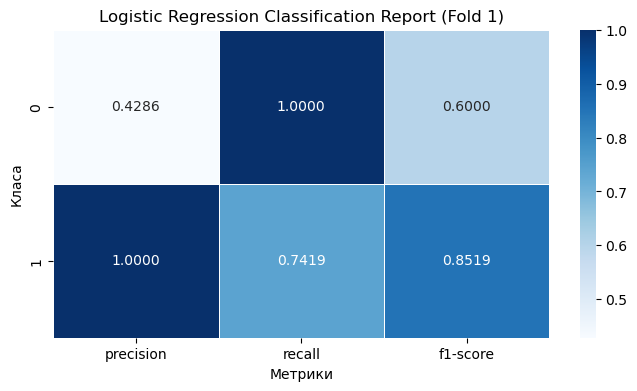


Random Forest:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        31

    accuracy                           0.97        37
   macro avg       0.93      0.98      0.95        37
weighted avg       0.98      0.97      0.97        37



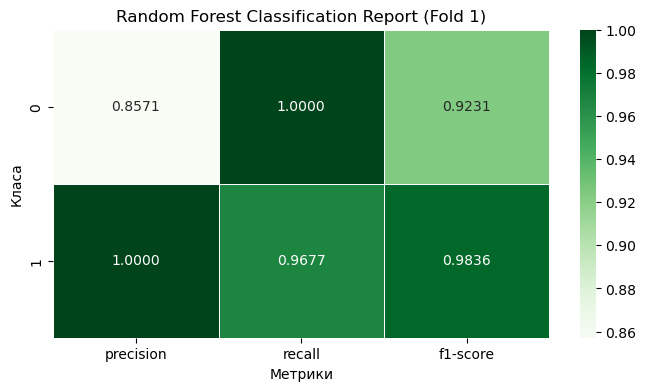


--- Fold 2 резултати ---

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.80      0.96      0.87        25

    accuracy                           0.81        37
   macro avg       0.83      0.73      0.75        37
weighted avg       0.82      0.81      0.79        37



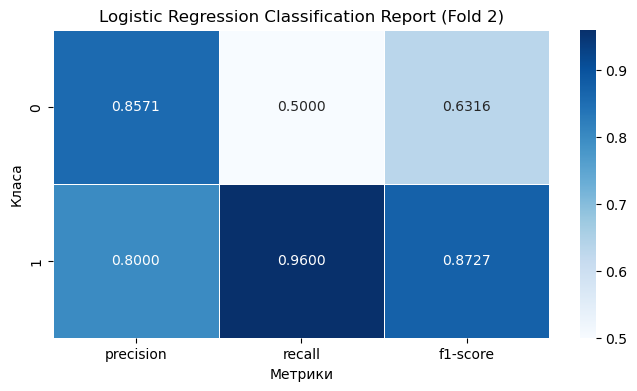


Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.79      0.92      0.85        25

    accuracy                           0.78        37
   macro avg       0.77      0.71      0.73        37
weighted avg       0.78      0.78      0.77        37



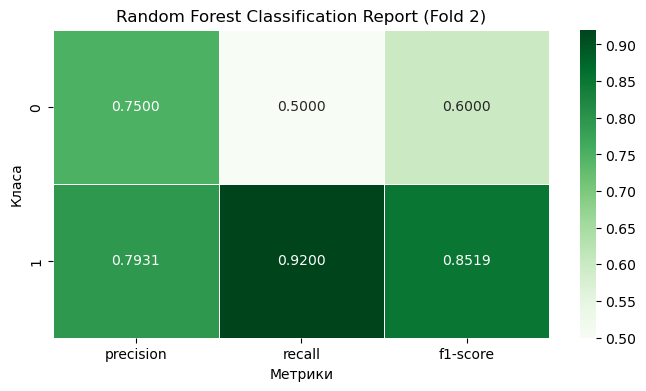


--- Fold 3 резултати ---

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      0.94      0.88        31

    accuracy                           0.78        37
   macro avg       0.41      0.47      0.44        37
weighted avg       0.69      0.78      0.74        37



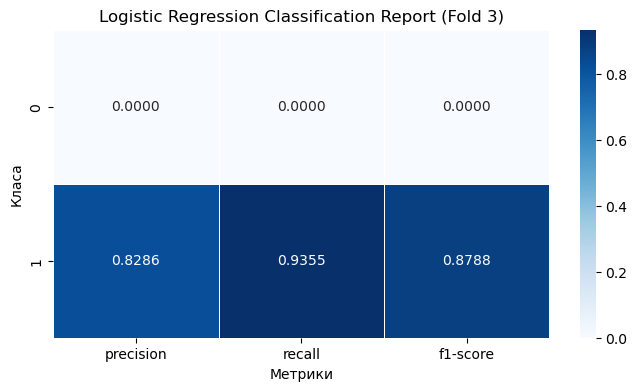


Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      0.94      0.88        31

    accuracy                           0.78        37
   macro avg       0.41      0.47      0.44        37
weighted avg       0.69      0.78      0.74        37



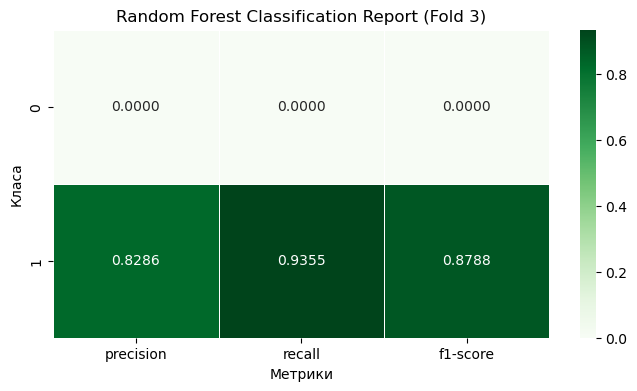


--- Fold 4 резултати ---

Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.80      0.80      0.80        30

    accuracy                           0.71        42
   macro avg       0.65      0.65      0.65        42
weighted avg       0.71      0.71      0.71        42



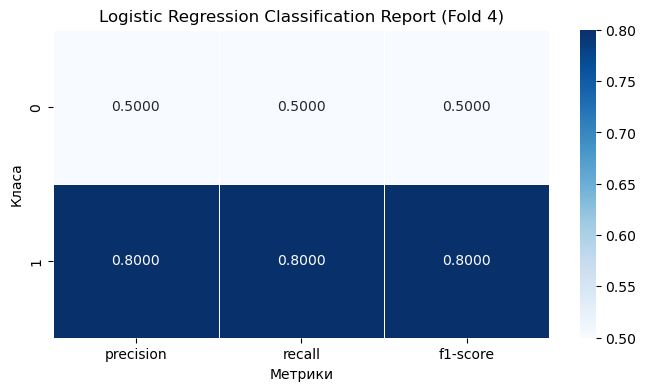


Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.81      0.83      0.82        30

    accuracy                           0.74        42
   macro avg       0.68      0.67      0.67        42
weighted avg       0.73      0.74      0.73        42



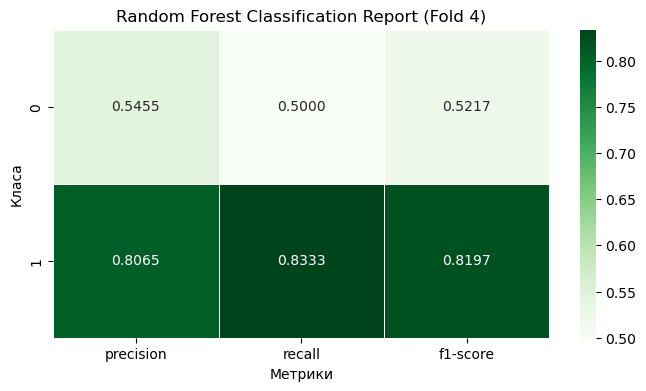


--- Fold 5 резултати ---

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.81      1.00      0.90        30

    accuracy                           0.83        42
   macro avg       0.91      0.71      0.74        42
weighted avg       0.86      0.83      0.81        42



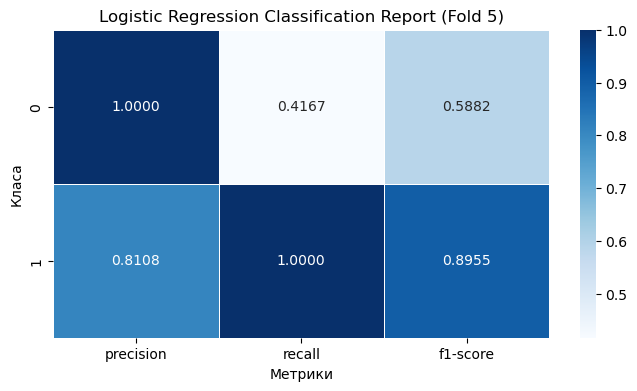


Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.78      0.93      0.85        30

    accuracy                           0.76        42
   macro avg       0.72      0.63      0.65        42
weighted avg       0.75      0.76      0.73        42



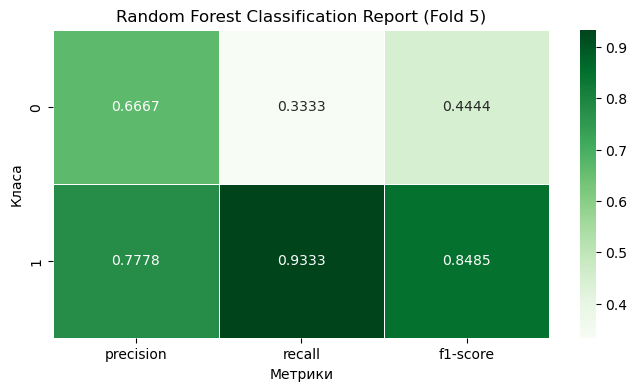

In [67]:
fold_num = 1
for train_index, test_index in gkf.split(X_model, y_model, groups):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

    # Модел: Логистичка Регресија
    lr_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' е добар за мали податочни множества
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    lr_report_dict = classification_report(y_test, lr_predictions, output_dict=True, zero_division=0) # zero_division=0 за да избегнете предупредувања

    # Модел: Случајна Шума (Random Forest)
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_report_dict = classification_report(y_test, rf_predictions, output_dict=True, zero_division=0)

    model_results.append({
        'Fold': fold_num,
        'Logistic Regression Accuracy': lr_accuracy,
        'Logistic Regression Report': lr_report_dict,
        'Random Forest Accuracy': rf_accuracy,
        'Random Forest Report': rf_report_dict
    })

    # Зачувување на важноста на карактеристиките за Random Forest
    if hasattr(rf_model, 'feature_importances_'):
        feature_importances_list.append(pd.Series(rf_model.feature_importances_, index=X_model.columns))

    print(f"\n--- Fold {fold_num} резултати ---")
    print("\nLogistic Regression:")
    # Печати текстуален classification report
    print(classification_report(y_test, lr_predictions, zero_division=0))

    # Графички приказ на Classification Report за Logistic Regression
    lr_report_df = pd.DataFrame(lr_report_dict).transpose()
    lr_report_df = lr_report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']] # Земи само класи 0 и 1
    
    plt.figure(figsize=(8, 4))
    sns.heatmap(lr_report_df, annot=True, cmap='Blues', fmt=".4f", linewidths=.5, cbar=True)
    plt.title(f"Logistic Regression Classification Report (Fold {fold_num})")
    plt.xlabel("Метрики")
    plt.ylabel("Класа")
    plt.show()

    print("\nRandom Forest:")
    # Печати текстуален classification report
    print(classification_report(y_test, rf_predictions, zero_division=0))

    # Графички приказ на Classification Report за Random Forest
    rf_report_df = pd.DataFrame(rf_report_dict).transpose()
    rf_report_df = rf_report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']] # Земи само класи 0 и 1

    plt.figure(figsize=(8, 4))
    sns.heatmap(rf_report_df, annot=True, cmap='Greens', fmt=".4f", linewidths=.5, cbar=True)
    plt.title(f"Random Forest Classification Report (Fold {fold_num})")
    plt.xlabel("Метрики")
    plt.ylabel("Класа")
    plt.show()

    fold_num += 1

In [69]:
# Пресметување на просечна важност на карактеристиките
if feature_importances_list:
    feature_importances_df = pd.DataFrame(feature_importances_list).mean()
    avg_feature_importances = feature_importances_df.sort_values(ascending=False)
else:
    avg_feature_importances = pd.Series() # Празна серија ако не се собрани важности


--- Просечни резултати од Генералниот модел (GroupKFold Cross-Validation) ---

Просечна точност на Logistic Regression: 0.7852
Просечна точност на Random Forest: 0.8081

--- Важност на атрибути (просек од Random Forest по фолдови) ---
spread1           0.205231
MDVP:Fo(Hz)       0.127358
spread2           0.115065
MDVP:Flo(Hz)      0.091140
MDVP:Fhi(Hz)      0.085547
MDVP:Jitter(%)    0.073346
MDVP:Shimmer      0.069900
D2                0.066826
DFA               0.063864
HNR               0.055188
RPDE              0.046535
dtype: float64


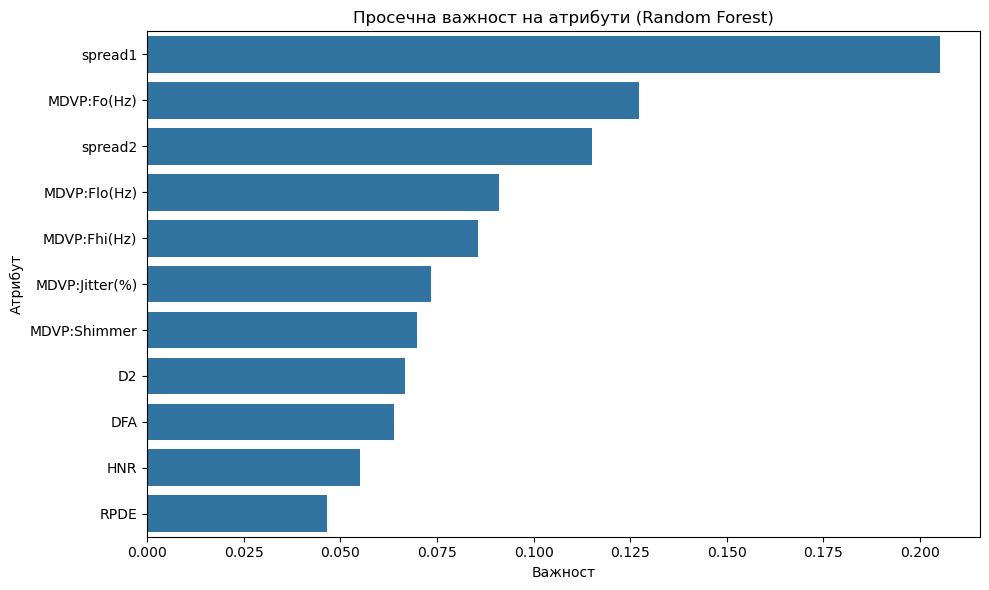

In [85]:
# Приказ на просечни резултати и важност на карактеристиките
print("\n--- Просечни резултати од Генералниот модел (GroupKFold Cross-Validation) ---")
avg_lr_accuracy = np.mean([res['Logistic Regression Accuracy'] for res in model_results])
avg_rf_accuracy = np.mean([res['Random Forest Accuracy'] for res in model_results])

print(f"\nПросечна точност на Logistic Regression: {avg_lr_accuracy:.4f}")
print(f"Просечна точност на Random Forest: {avg_rf_accuracy:.4f}")

if not avg_feature_importances.empty:
    print("\n--- Важност на атрибути (просек од Random Forest по фолдови) ---")
    print(avg_feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_feature_importances.values, y=avg_feature_importances.index)
    plt.title("Просечна важност на атрибути (Random Forest)")
    plt.xlabel("Важност")
    plt.ylabel("Атрибут")
    plt.tight_layout()
    plt.show()
else:
    print("\nНема пресметана важност на атрибути (веројатно поради проблем со моделот).")

In [87]:
# --- Заклучоци и Терапевтски препораки (Симулациски) ---
print("\n--- Заклучоци и Терапевтски препораки (Симулациски) ---")

print("\n**Заклучоци од анализата на стадиумите по пациент:**")
if not multi_sample_subjects:
    print("- Нема пациенти со повеќекратни снимки за временска анализа.")
else:
    print("- Забележано е следење на состојбата (status) и биомаркерите кај пациенти со повеќекратни снимки.")
    print("- Кај некои пациенти е забележано влошување на состојбата, кај други подобрување, што укажува на прогресија на болеста или дијагностицирање.")
    print("- Визуелизациите на биомаркери како MDVP:Fo(Hz) покажуваат индивидуални трендови, кои може да се користат за следење на болеста.")

print("\n**Заклучоци од генералниот класификациски модел:**")
print(f"- Моделите (Logistic Regression и Random Forest) покажуваат добра способност за класификација на лица со Паркинсонова болест врз основа на гласовни карактеристики.")
print(f"- Просечна точност на Logistic Regression: {avg_lr_accuracy:.4f}")
print(f"- Просечна точност на Random Forest: {avg_rf_accuracy:.4f}")
print("- Random Forest моделот генерално покажува подобри перформанси и овозможува анализа на важноста на атрибутите.")
print("- Најважните атрибути (според Random Forest) се индикатори за тоа кои гласовни карактеристики се најрелевантни за дијагноза.")
if not avg_feature_importances.empty:
    print(f"- Најважни карактеристики: {', '.join(avg_feature_importances.head(5).index.tolist())}")

print("\n**Симулациски Терапевтски Препораки:**")
print("Врз основа на оваа анализа, би можеле да се дадат следниве симулациски препораки:")
print("1. **Ран скрининг и дијагноза:** Со оглед на високата точност на класификацискиот модел, гласовната анализа може да се користи како неинвазивна алатка за ран скрининг на Паркинсонова болест. Раното откривање е клучно за навремено започнување на третманот.")
print("2. **Персонализирано следење:** За пациенти со повеќекратни снимки, редовното следење на гласовните биомаркери (особено оние што моделот ги идентификува како важни) може да помогне во следењето на прогресијата на болеста и ефикасноста на третманот.")
print("3. **Интервенција при влошување:** Доколку анализата по пациент покаже знаци на влошување (промена на статус или негативни трендови кај клучните биомаркери), треба да се разгледаат терапевтски интервенции, како прилагодување на лекови или препорака за физикална/говорна терапија.")
print("4. **Фокус на клучни атрибути:** Идентификуваните важни атрибути (на пр., MDVP:Fo(Hz), MDVP:Jitter(%), MDVP:Shimmer(%)) треба да бидат фокус при понатамошни истражувања и развој на дијагностички алатки.")
print("5. **Развој на поддршка за одлучување:** Може да се развијат системи за поддршка на клинички одлучувања кои ги интегрираат резултатите од гласовната анализа за да им помогнат на лекарите во поставувањето дијагноза и планирањето на третманот.")
print("\n**Важна забелешка:** Овие препораки се базираат на анализа на дадениот сет на податоци и се симулациски. За вистински медицински одлуки, секогаш е неопходна консултација со стручен медицински персонал и клинички испитувања.")


--- Заклучоци и Терапевтски препораки (Симулациски) ---

**Заклучоци од анализата на стадиумите по пациент:**
- Забележано е следење на состојбата (status) и биомаркерите кај пациенти со повеќекратни снимки.
- Кај некои пациенти е забележано влошување на состојбата (промена на status од 0 во 1), што укажува на прогресија на болеста или дијагностицирање.
- Визуелизациите на биомаркери како MDVP:Fo(Hz) покажуваат индивидуални трендови, кои може да се користат за следење на болеста.

**Заклучоци од генералниот класификациски модел:**
- Моделите (Logistic Regression и Random Forest) покажуваат добра способност за класификација на лица со Паркинсонова болест врз основа на гласовни карактеристики.
- Просечна точност на Logistic Regression: 0.7852
- Просечна точност на Random Forest: 0.8081
- Random Forest моделот генерално покажува подобри перформанси и овозможува анализа на важноста на атрибутите.
- Најважните атрибути (според Random Forest) се индикатори за тоа кои гласовни карактеристики